<a href="https://colab.research.google.com/github/marciofag/ciencia-de-dados-compass-uol/blob/main/projeto3/risco_de_credito_em_emprestimos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 3
## Risco de inadimplência e crédito em empréstimos

O projeto envolve a análise de risco de inadimplência e crédito em empréstimos utilizando métodos de ciência de dados e machine learning. Vamos abordar os seguintes passos:
- Exploração de Dados
- Pré-processamento de Dados
- Desenvolvimento do Modelo
- Avaliação do Modelo
- Apresentação dos Resultados


# Importações e Carregamento dos Dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.ensemble import RandomForestClassifier


Primeiro, vamos carregar os arquivos para entender melhor as colunas disponíveis e seus dados.

In [2]:
# Carregando os dados principais de treinamento e teste
application_train = pd.read_csv('/content/drive/Othercomputers/Meu computador/projects/#Compass UOL/ciencia-de-dados-compass-uol/projeto3/archive/application_train.csv')
application_test = pd.read_csv('/content/drive/Othercomputers/Meu computador/projects/#Compass UOL/ciencia-de-dados-compass-uol/projeto3/archive/application_test.csv')

# Carregando os demais datasets
bureau = pd.read_csv('/content/drive/Othercomputers/Meu computador/projects/#Compass UOL/ciencia-de-dados-compass-uol/projeto3/archive/bureau.csv')
bureau_balance = pd.read_csv('/content/drive/Othercomputers/Meu computador/projects/#Compass UOL/ciencia-de-dados-compass-uol/projeto3/archive/bureau_balance.csv')
pos_cash_balance = pd.read_csv('/content/drive/Othercomputers/Meu computador/projects/#Compass UOL/ciencia-de-dados-compass-uol/projeto3/archive/POS_CASH_balance.csv')
credit_card_balance = pd.read_csv('/content/drive/Othercomputers/Meu computador/projects/#Compass UOL/ciencia-de-dados-compass-uol/projeto3/archive/credit_card_balance.csv')
previous_application = pd.read_csv('/content/drive/Othercomputers/Meu computador/projects/#Compass UOL/ciencia-de-dados-compass-uol/projeto3/archive/previous_application.csv')
installments_payments = pd.read_csv('/content/drive/Othercomputers/Meu computador/projects/#Compass UOL/ciencia-de-dados-compass-uol/projeto3/archive/installments_payments.csv')

# Visão geral dos dados
1. Mostrar as colunas e as primeiras 5 linhas de cada dataset.
2. Verificar o tamanho da tabela

In [3]:
# Treino de aplicação
print("Colunas:", application_train.columns.tolist())
print(f"\nTamanho da tabela: {application_train.shape[0]} registros")
application_train.head()

Colunas: ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_A

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Teste de aplicação
print("Colunas:", application_test.columns.tolist())
print(f"\nTamanho da tabela: {application_test.shape[0]} registros")
application_test.head()

Colunas: ['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEV

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Birô de crédito
print(f"Tamanho da tabela: {bureau.shape[0]} registros")
bureau.head()

Tamanho da tabela: 1716428 registros


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [6]:
# Balanço do Birô de crédito
print(f"Tamanho da tabela: {bureau_balance.shape[0]} registros")
bureau_balance.head()

Tamanho da tabela: 27299925 registros


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [7]:
# Balanço mensal de empréstimos
print(f"Tamanho da tabela: {pos_cash_balance.shape[0]} registros")
pos_cash_balance.head()

Tamanho da tabela: 10001358 registros


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [8]:
# Balanço mensal do cartão de crédito
print("Colunas:", credit_card_balance.columns.tolist())
print(f"\nTamanho da tabela: {credit_card_balance.shape[0]} registros")
credit_card_balance.head()

Colunas: ['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD', 'SK_DPD_DEF']

Tamanho da tabela: 3840312 registros


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [9]:
# Aplicações anteriores
print("Colunas:", previous_application.columns.tolist())
print(f"\nTamanho da tabela: {previous_application.shape[0]} registros")
previous_application.head()

Colunas: ['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']

Tamanho da tabela: 1670214 registros


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Histórico de pagamentos
print(f"Tamanho da tabela: {installments_payments.shape[0]} registros")
installments_payments.head()

Tamanho da tabela: 13605401 registros


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


# Separar os Dados em Conjuntos de Treino e Teste
Nesta etapa, optei dividir o dataset "application_train" em treino e teste, por já conter a coluna 'Target'.

In [11]:
# Separar os dados em conjuntos de treino (80%) e teste (20%)
train_df, test_df = train_test_split(application_train, test_size=0.2, random_state=42)

# Salvar os conjuntos de treino e teste em arquivos CSV
train_df.to_csv('train.csv', index=False)
test_df.to_csv('test.csv', index=False)

In [12]:
# Tamanho das aplicações de treino e teste após divisão
print(f"Tamanho da tabela de treino: {train_df.shape[0]} registros")
print(f"Tamanho da tabela de teste: {test_df.shape[0]} registros")

Tamanho da tabela de treino: 246008 registros
Tamanho da tabela de teste: 61503 registros


Aqui iremos selecionar e manter apenas as colunas que serão relevantes para as análises e aplicação de treino

In [13]:
# Selecionar as colunas desejadas 'train_df_selected'
train_df_selected = train_df[[
    'SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_PHONE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_YEAR'
]].copy()

In [14]:
# Selecionar as colunas desejadas 'test_df_selected'
test_df_selected = test_df[[
    'SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_PHONE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_YEAR'
]].copy()

In [15]:
# Nova aplicação de treino com seleção de colunas relevantes para as análises
print(f"Número de colunas após seleção: {len(train_df_selected.columns)}")
train_df_selected.head()

Número de colunas após seleção: 20


,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR
123473,243191,0,F,Y,N,0,171000.0,555273.0,16366.5,463500.0,Pensioner,Secondary / secondary special,Widow,-23349,365243,0,NaN,1.0,-2058.0,1.0
10118,111778,0,M,N,Y,1,157500.0,198085.5,23638.5,171000.0,Working,Secondary / secondary special,Married,-10921,-117,1,Laborers,3.0,-73.0,1.0
64716,175057,1,M,Y,Y,0,135000.0,776304.0,25173.0,648000.0,Working,Lower secondary,Civil marriage,-23213,-2157,0,Drivers,2.0,-1959.0,5.0
234940,372147,0,M,Y,Y,1,164133.0,900000.0,36787.5,900000.0,Commercial associate,Secondary / secondary special,Married,-10703,-2530,1,High skill tech staff,3.0,-531.0,3.0
236051,373412,0,M,N,Y,0,225000.0,533668.5,21294.0,477000.0,Commercial associate,Secondary / secondary special,Married,-15798,-3520,0,Laborers,2.0,-9.0,4.0


# Análise Exploratória de Dados
Vamos analisar os arquivos fornecidos e identificar os dados relevantes para a criação de um modelo de classificação binária para prever a probabilidade de inadimplência dos clientes.

O objetivo aqui é entender melhor as características dos datasets e identificar padrões, tendências, e possíveis problemas nos dados.

Veremos também como a variável "Target" se relaciona com as demais informações.

Vamos começar por verificar a estrutura e o conteúdo dos arquivos CSV fornecidos:

## Verificação Inicial dos Dados

In [16]:
# Tipo dos dados das colunas do dataset de treinamento
print("Tipos das colunas:")
print(train_df_selected.dtypes)

Tipos das colunas:
SK_ID_CURR                      int64
TARGET                          int64
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
FLAG_PHONE                      int64
OCCUPATION_TYPE                object
CNT_FAM_MEMBERS               float64
DAYS_LAST_PHONE_CHANGE        float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
dtype: object


In [17]:
# Estatísticas descritivas no dataset de treinamento
# Selecionando colunas que fazem sentido fazer esta análise descritiva
train_df_selected_desc = train_df_selected[['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS','AMT_REQ_CREDIT_BUREAU_YEAR']]
train_df_selected_desc.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,AMT_REQ_CREDIT_BUREAU_YEAR
count,246008.000000,2.460080e+05,2.460080e+05,245998.000000,2.457840e+05,246008.000000,246008.000000,246007.000000,212797.000000
mean,0.416230,1.684589e+05,5.996413e+05,27120.236898,5.389831e+05,-16038.934417,63852.885366,2.152642,1.901126
std,0.720665,1.045299e+05,4.030988e+05,14510.664192,3.700527e+05,4361.270335,141306.599308,0.908734,1.870273
min,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,-25229.000000,-17912.000000,1.000000,0.000000
25%,0.000000,1.125000e+05,2.700000e+05,16506.000000,2.385000e+05,-19682.000000,-2758.000000,2.000000,0.000000
50%,0.000000,1.462500e+05,5.147775e+05,24903.000000,4.500000e+05,-15755.000000,-1212.000000,2.000000,1.000000
75%,1.000000,2.025000e+05,8.086500e+05,34654.500000,6.795000e+05,-12418.000000,-288.000000,3.000000,3.000000
max,19.000000,1.350000e+07,4.050000e+06,258025.500000,4.050000e+06,-7489.000000,365243.000000,20.000000,25.000000


## Verificação de Qualidade dos Dados
- Dados Nulos
- Dados Duplicados


In [18]:
# Verificar a existência de dados nulos no dataset de treinamento (somente as colunas filtradas e com dados faltantes)
missing_values = train_df_selected.isnull().sum().sort_values(ascending=False).loc[lambda x: x > 0]
missing_values_percentage = (missing_values / len(train_df)) * 100
missing_values_df = pd.DataFrame({'Total': missing_values, 'Percent': missing_values_percentage})
print(missing_values_df.to_string())

                            Total    Percent
OCCUPATION_TYPE             77106  31.342883
AMT_REQ_CREDIT_BUREAU_YEAR  33211  13.499967
AMT_GOODS_PRICE               224   0.091054
AMT_ANNUITY                    10   0.004065
DAYS_LAST_PHONE_CHANGE          1   0.000406
CNT_FAM_MEMBERS                 1   0.000406


Analisando as colunas acima, consideramos que os dados faltantes de:
- OCCUPATION_TYPE podem ser convertidos em "Unemployed" (desempregado);
- AMT_REQ_CREDIT_BUREAU_YEAR pode-se considerar 0.0 (zero);
- As demais colunas terão os registros com dados nulos excluídos.

In [19]:
# Verificar a existência de valores nulos no dataset 'train_df_selected'
train_df_selected = train_df_selected.fillna({
    'OCCUPATION_TYPE': 'Unemployed',
    'AMT_REQ_CREDIT_BUREAU_YEAR': 0.0
})

# Excluir registros das demais colunas com dados faltantes
train_df_selected.dropna(subset=['AMT_GOODS_PRICE', 'AMT_ANNUITY', 'DAYS_LAST_PHONE_CHANGE', 'CNT_FAM_MEMBERS'], inplace=True)

In [20]:
# Verificar novamente o dataset 'train_df_selected' para garantir que os valores faltantes foram tratados
missing_values_after = train_df_selected.isnull().sum().sort_values(ascending=False).loc[lambda x: x > 0]
print(missing_values_after.to_string())

Series([], )


In [21]:
# Verificação de dados duplicados no dataset de treinamento
duplicados_train = train_df_selected.duplicated().sum()
print(f'Número de duplicatas em train_df_selected: {duplicados_train}')

Número de duplicatas em train_df_selected: 0


Exibir as primeiras linhas do DataFrame tratado

In [22]:
# Aplicação de treino e tamanho da tabela após exclusões e tratamento
print(f"\nTamanho da tabela: {train_df_selected.shape[0]} registros")
print(f"Número de colunas: {len(train_df_selected.columns)}")
train_df_selected.head()


Tamanho da tabela: 245773 registros
Número de colunas: 20


,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR
123473,243191,0,F,Y,N,0,171000.0,555273.0,16366.5,463500.0,Pensioner,Secondary / secondary special,Widow,-23349,365243,0,Unemployed,1.0,-2058.0,1.0
10118,111778,0,M,N,Y,1,157500.0,198085.5,23638.5,171000.0,Working,Secondary / secondary special,Married,-10921,-117,1,Laborers,3.0,-73.0,1.0
64716,175057,1,M,Y,Y,0,135000.0,776304.0,25173.0,648000.0,Working,Lower secondary,Civil marriage,-23213,-2157,0,Drivers,2.0,-1959.0,5.0
234940,372147,0,M,Y,Y,1,164133.0,900000.0,36787.5,900000.0,Commercial associate,Secondary / secondary special,Married,-10703,-2530,1,High skill tech staff,3.0,-531.0,3.0
236051,373412,0,M,N,Y,0,225000.0,533668.5,21294.0,477000.0,Commercial associate,Secondary / secondary special,Married,-15798,-3520,0,Laborers,2.0,-9.0,4.0


In [23]:
# Verificação de dados nulos em outros datasets
print("Valores ausentes em 'bureau':")
print(bureau.isnull().sum().sort_values(ascending=False).loc[lambda x: x > 0].to_string(),'\n')
print("Valores ausentes em 'bureau_balance':")
print(bureau_balance.isnull().sum().sort_values(ascending=False).loc[lambda x: x > 0].to_string(),'\n')
print("Valores ausentes em 'pos_cash_balance':")
print(pos_cash_balance.isnull().sum().sort_values(ascending=False).loc[lambda x: x > 0].to_string(),'\n')
print("Valores ausentes em 'credit_card_balance':")
print(credit_card_balance.isnull().sum().sort_values(ascending=False).loc[lambda x: x > 0].to_string(),'\n')
print("Valores ausentes em 'previous_application':")
print(previous_application.isnull().sum().sort_values(ascending=False).loc[lambda x: x > 0].to_string(),'\n')
print("Valores ausentes em 'installments_payments':")
print(installments_payments.isnull().sum().sort_values(ascending=False).loc[lambda x: x > 0].to_string(),'\n')


Valores ausentes em 'bureau':
AMT_ANNUITY               1226791
AMT_CREDIT_MAX_OVERDUE    1124488
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_DEBT        257669
DAYS_CREDIT_ENDDATE        105553
AMT_CREDIT_SUM                 13 

Valores ausentes em 'bureau_balance':
Series([], ) 

Valores ausentes em 'pos_cash_balance':
CNT_INSTALMENT_FUTURE    26087
CNT_INSTALMENT           26071 

Valores ausentes em 'credit_card_balance':
AMT_PAYMENT_CURRENT           767988
AMT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_POS_CURRENT      749816
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
AMT_INST_MIN_REGULARITY       305236 

Valores ausentes em 'previous_application':
RATE_INTEREST_PRIVILEGED     1664263
RATE_INTEREST_PRIMARY        1664263
AMT_DOWN_PAYMENT              895844
RATE_DOWN_PAYMENT             895844
NAM

## Tratamento de Outliers

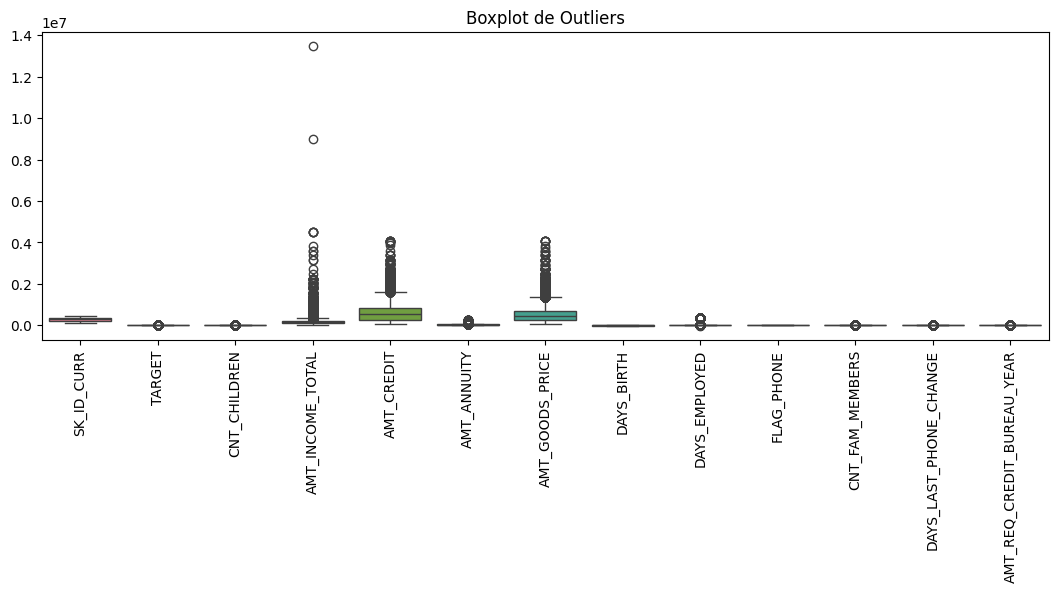

In [24]:
# Identificação de outliers
fig, ax = plt.subplots(figsize=(13, 4))
sns.boxplot(data=train_df_selected.select_dtypes(include=[np.number]), ax=ax)
plt.xticks(rotation=90)
plt.title('Boxplot de Outliers')
plt.show()

O boxplot acima mostra a distribuição dos valores numéricos selecionados do dataset. Cada ponto fora dos limites do boxplot representa um outlier, ou seja, um valor que está significativamente afastado da maioria dos dados.

Colunas com Outliers Significativos:
- AMT_INCOME_TOTAL: Muitos outliers, indicando que há uma variabilidade significativa na renda total dos aplicantes.
- AMT_CREDIT: Outliers notáveis, sugerindo variabilidade no valor do crédito.
- AMT_ANNUITY: Presença de alguns outliers.
- AMT_GOODS_PRICE: Também mostra outliers, o que pode indicar variabilidade nos preços dos bens adquiridos.

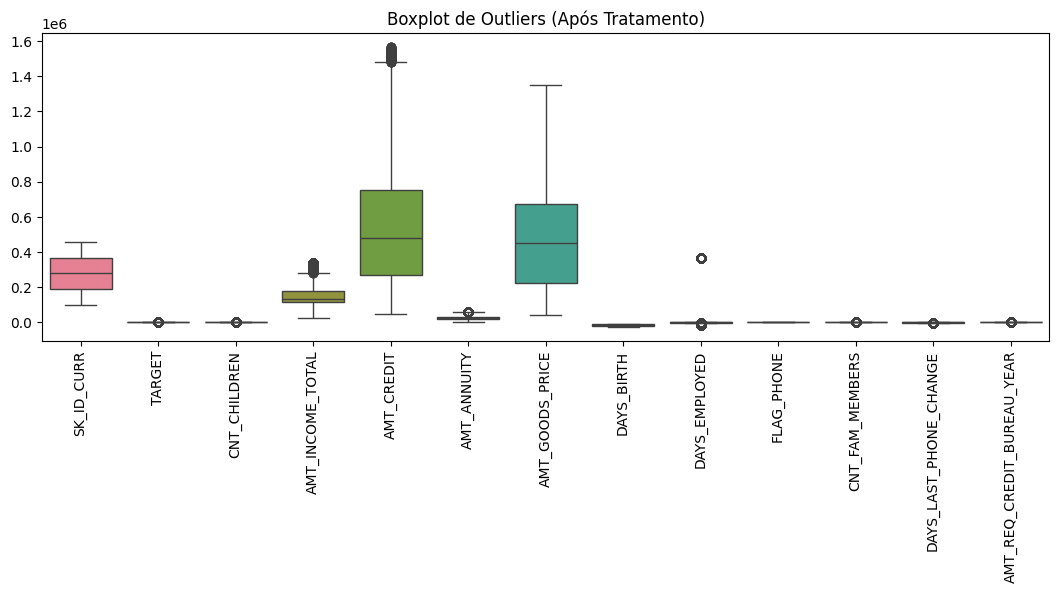

In [25]:
# Função para remover outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remover outliers das colunas identificadas
columns_with_outliers = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
for column in columns_with_outliers:
    train_df_selected = remove_outliers(train_df_selected, column)

# Verificar novamente para garantir que os outliers foram tratados
fig, ax = plt.subplots(figsize=(13, 4))
sns.boxplot(data=train_df_selected.select_dtypes(include=[np.number]), ax=ax)
plt.xticks(rotation=90)
plt.title('Boxplot de Outliers (Após Tratamento)')
plt.show()


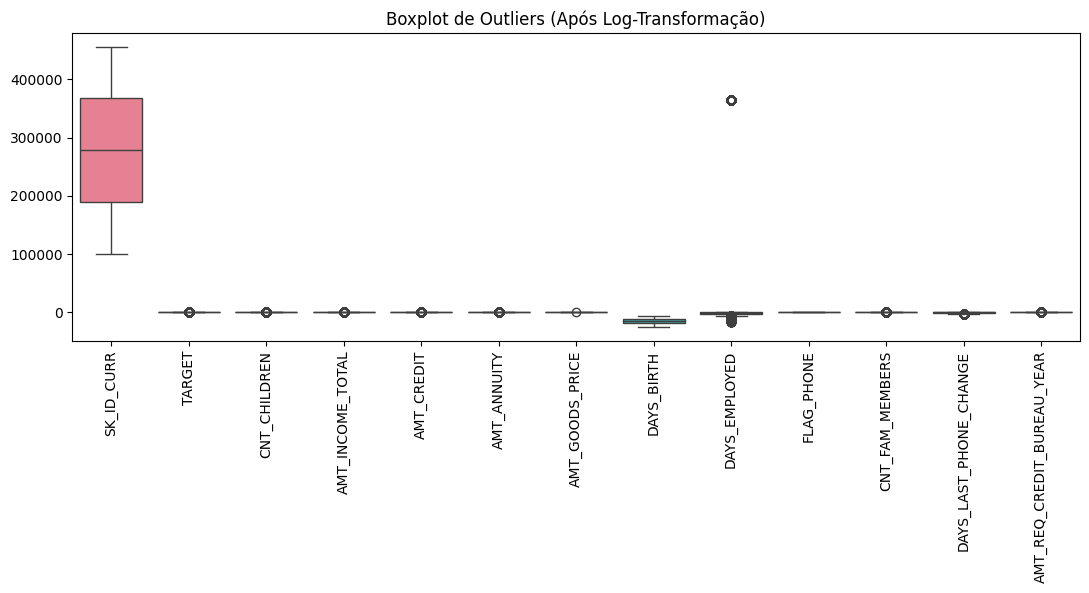

In [26]:
# Log-transformação das colunas com outliers
for column in columns_with_outliers:
    train_df_selected[column] = np.log1p(train_df_selected[column])

# Verificar novamente para garantir que a transformação foi aplicada
fig, ax = plt.subplots(figsize=(13, 4))
sns.boxplot(data=train_df_selected.select_dtypes(include=[np.number]), ax=ax)
plt.xticks(rotation=90)
plt.title('Boxplot de Outliers (Após Log-Transformação)')
plt.show()


Essas etapas ajudarão a garantir que os dados estejam limpos e preparados para análise e modelagem, minimizando o impacto de outliers nos resultados.

## Análises da Variável Target

Distribuição da variável TARGET

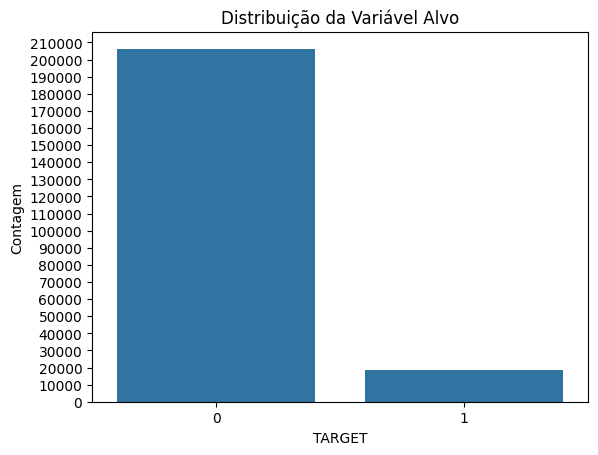

In [27]:
# Plot da distribuição da variável alvo (TARGET)
sns.countplot(x='TARGET', data=train_df_selected)
plt.title('Distribuição da Variável Alvo')
plt.ylim(0, train_df_selected['TARGET'].value_counts().max() + 10000)
plt.yticks(range(0, train_df_selected['TARGET'].value_counts().max() + 10000, 10000))
plt.xlabel('TARGET')
plt.ylabel('Contagem')
plt.show()

Análise de Correlações

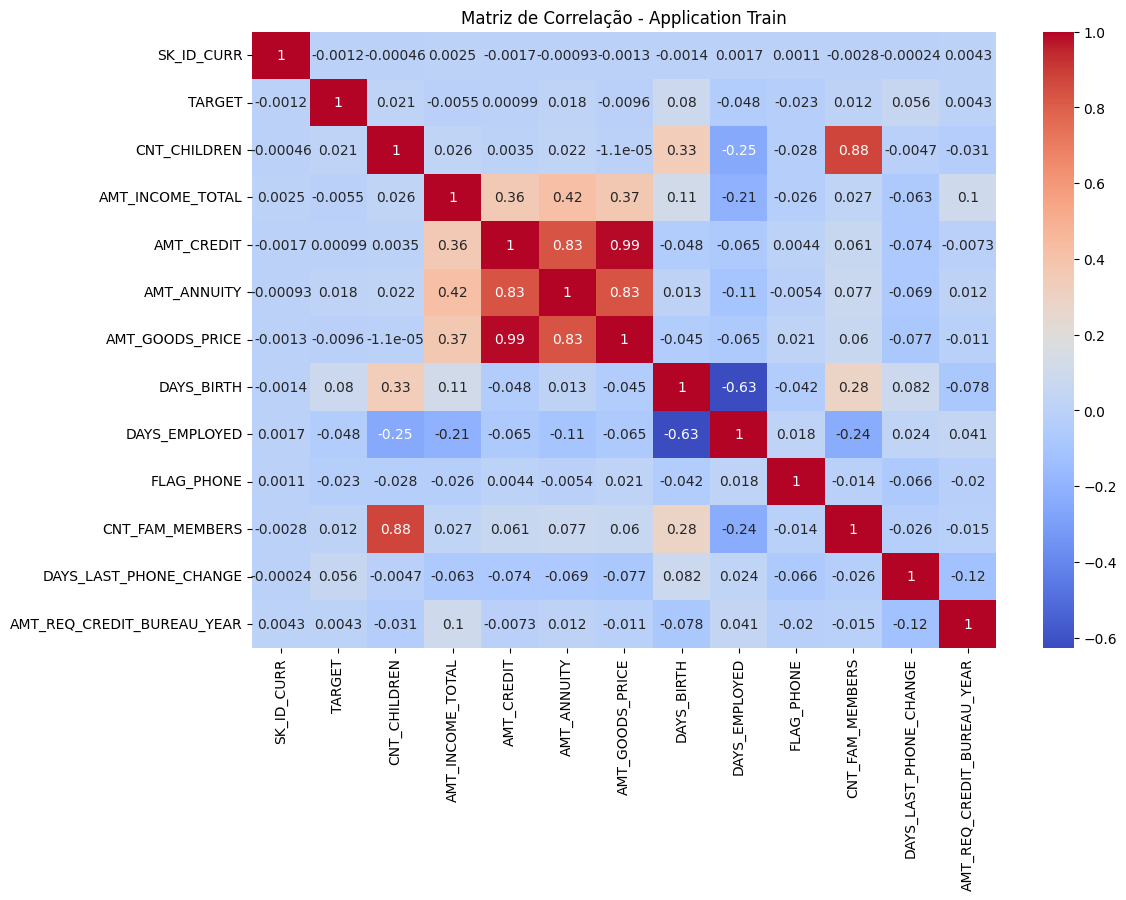

In [28]:
# Matriz de correlação
plt.figure(figsize=(12, 8))

# Apenas colunas numéricas para análise de correlação
numerical_df = train_df_selected.select_dtypes(include=['number'])

sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação - Application Train')
plt.show()

Alguns pontos importantes desta matriz:

- A variável TARGET tem uma correlação negativa moderada com DAYS_EMPLOYED. Isso sugere que clientes com maior tempo de emprego tendem a ter uma menor probabilidade de inadimplência.
- DAYS_LAST_PHONE_CHANGE também mostra uma correlação positiva com TARGET, o que pode indicar que clientes que recentemente mudaram de número de telefone têm uma maior probabilidade de inadimplência.

Análise univariada das variáveis numéricas

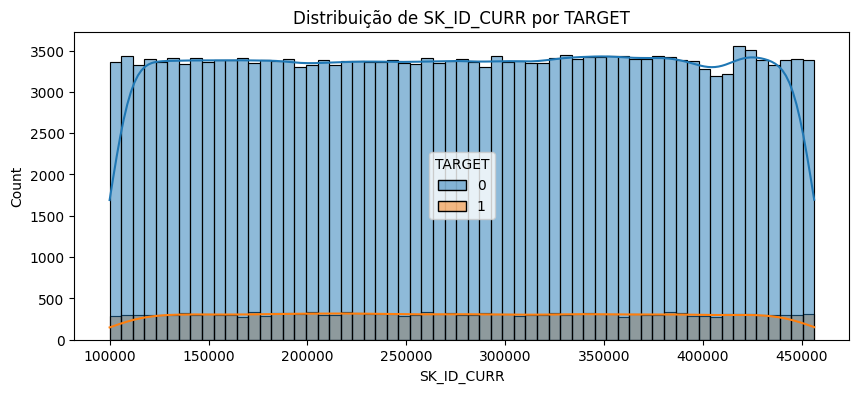

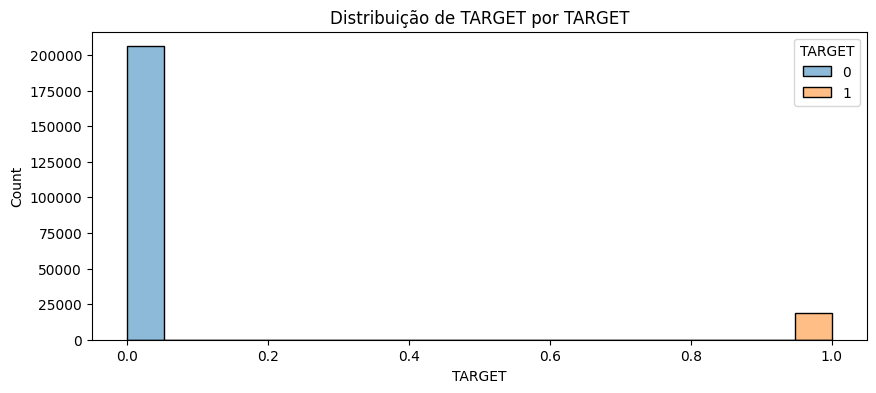

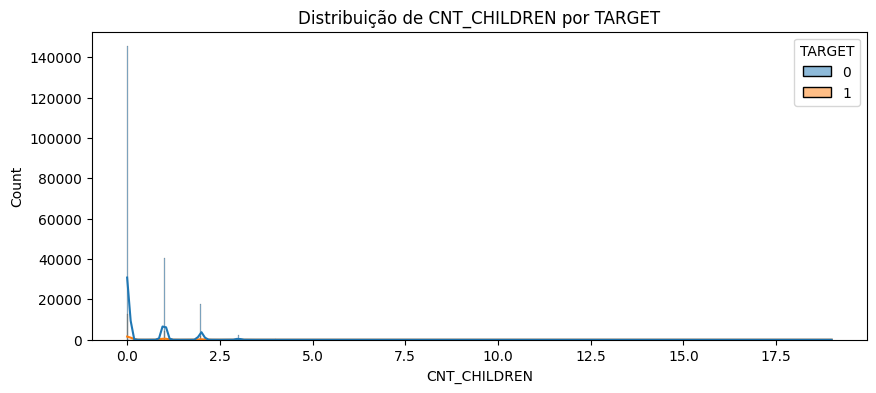

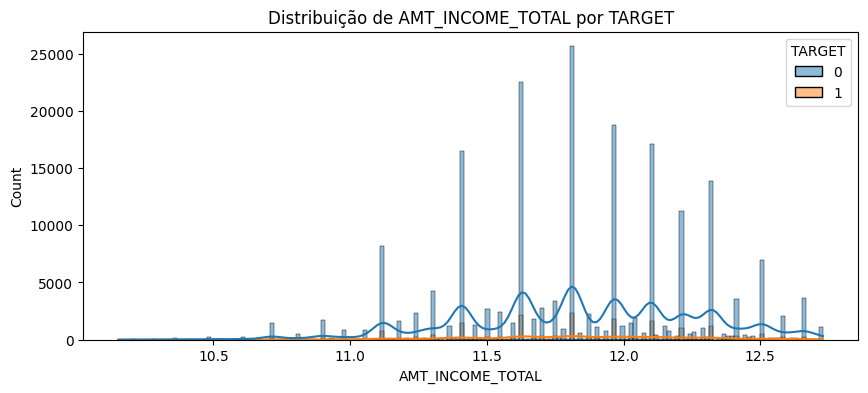

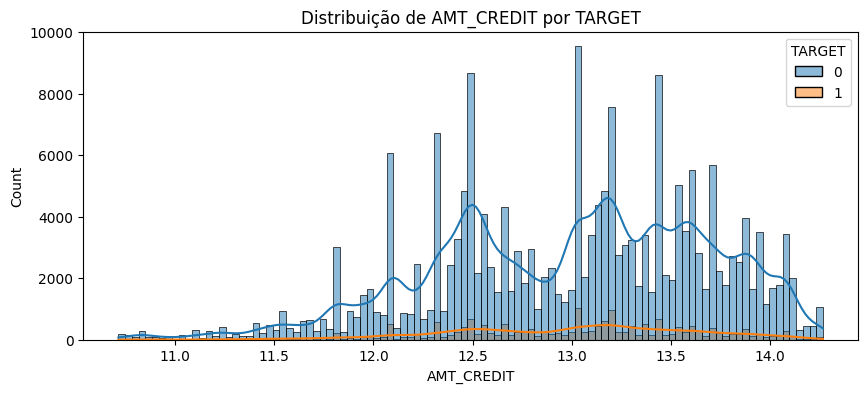

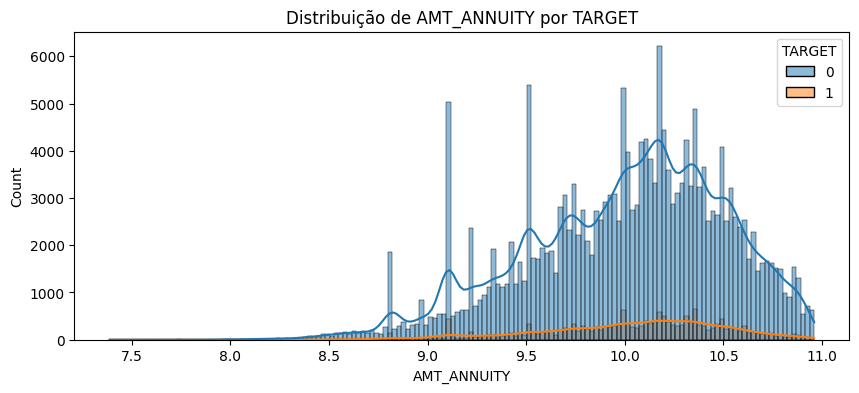

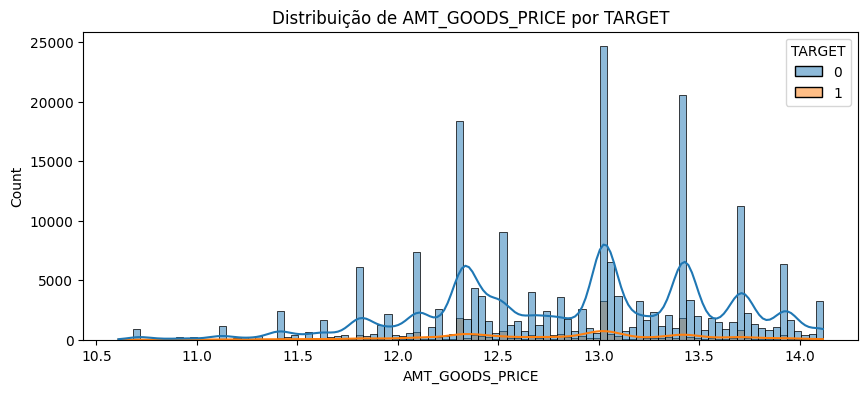

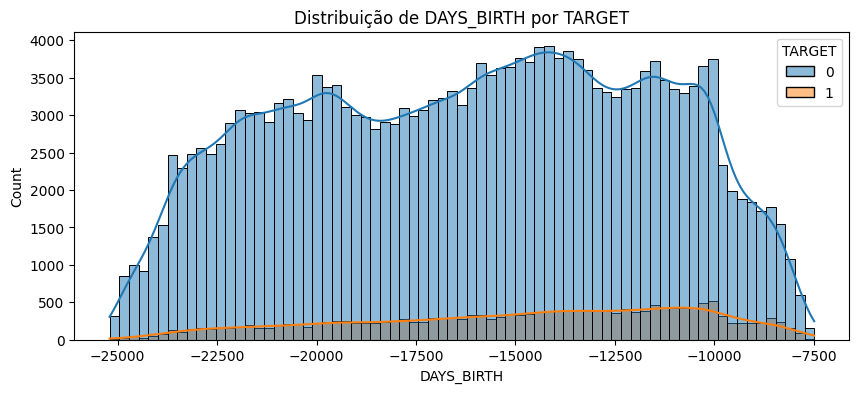

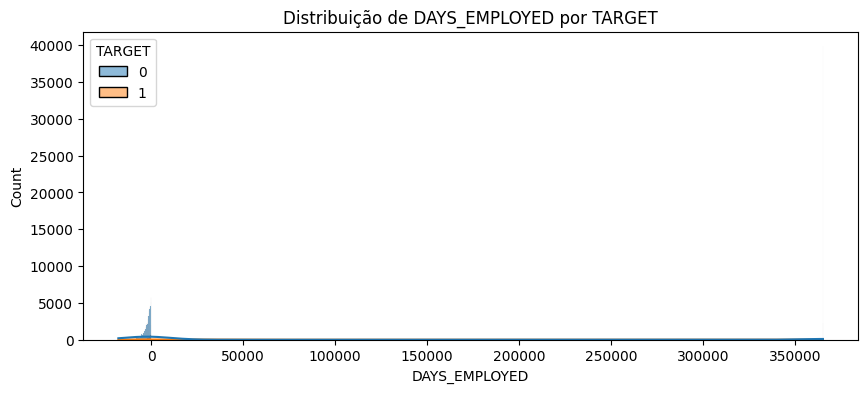

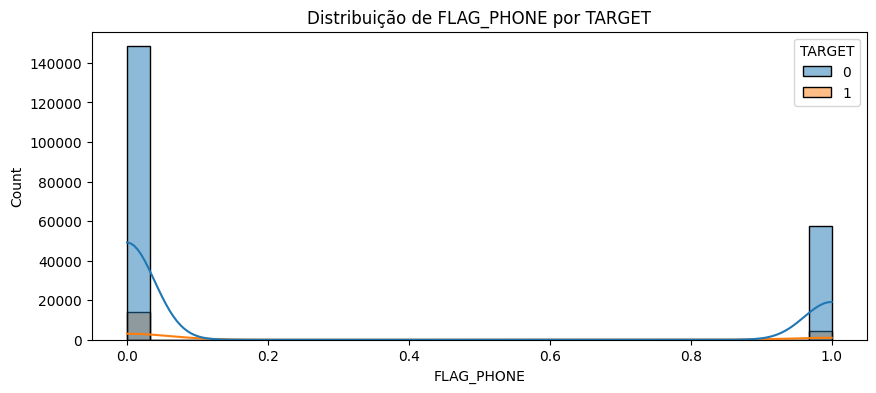

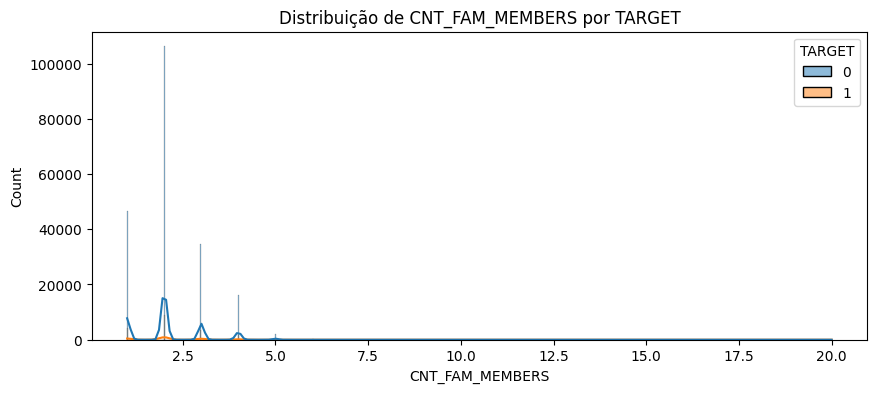

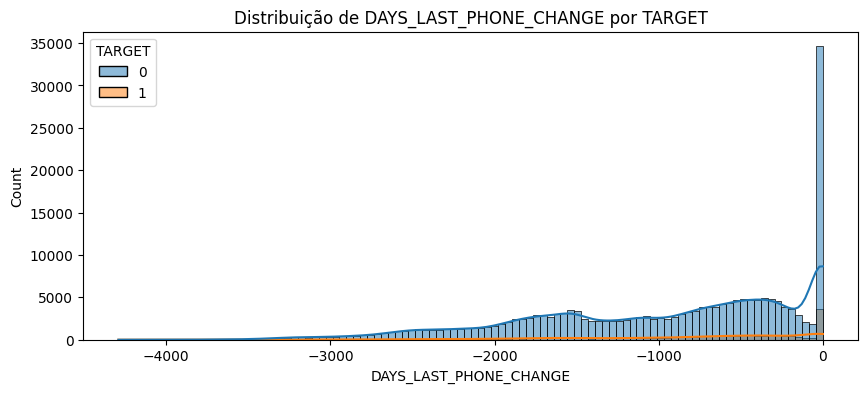

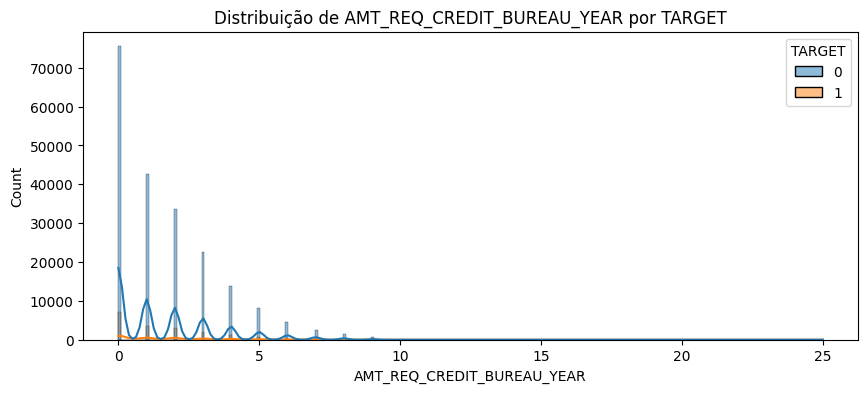

In [29]:
# Histogramas das variáveis numéricas por TARGET
num_cols = train_df_selected.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=train_df_selected, x=col, hue='TARGET', kde=True)
    plt.title(f'Distribuição de {col} por TARGET')
    plt.show()


Análise univariada das variáveis categóricas

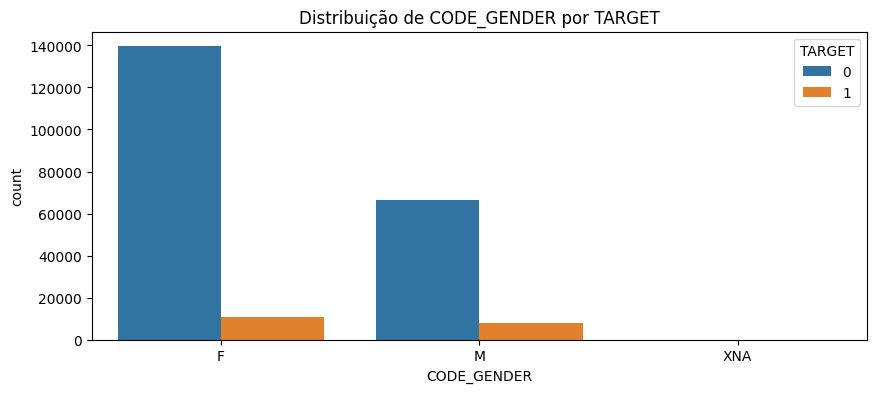

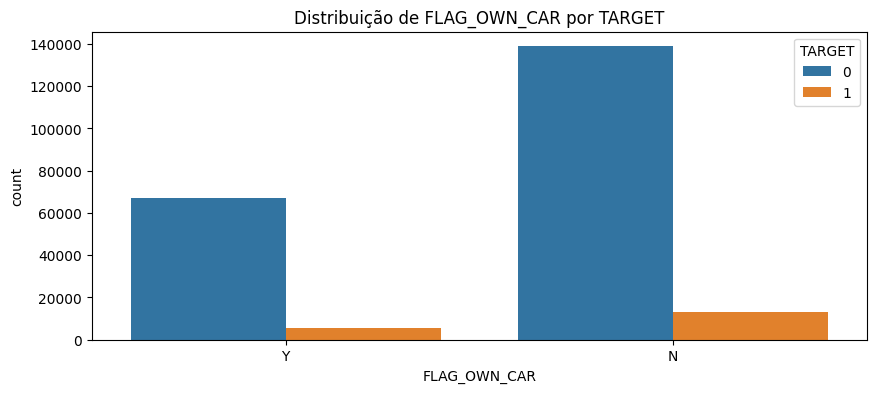

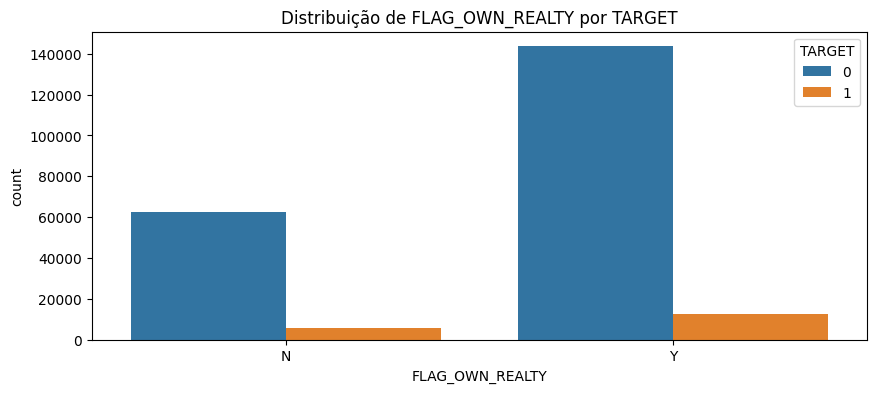

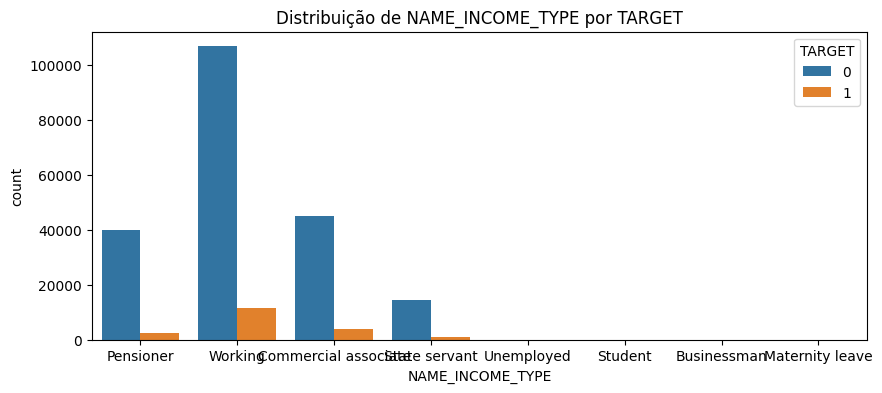

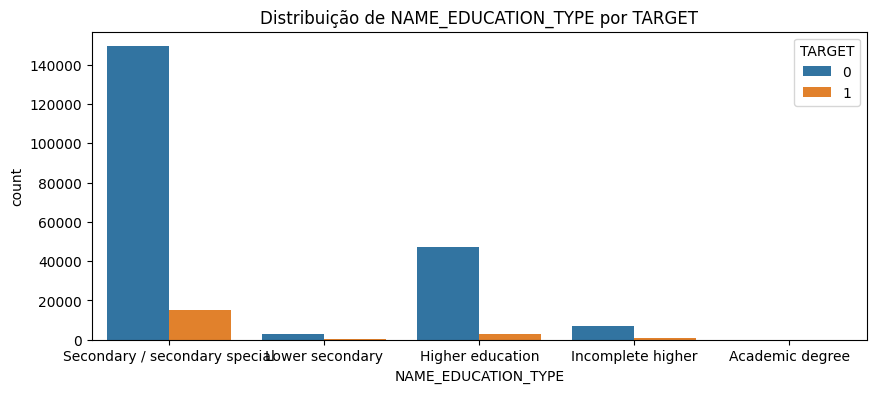

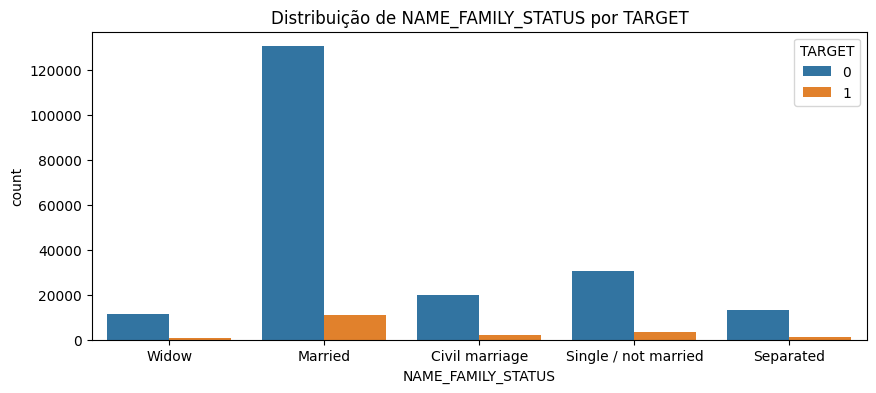

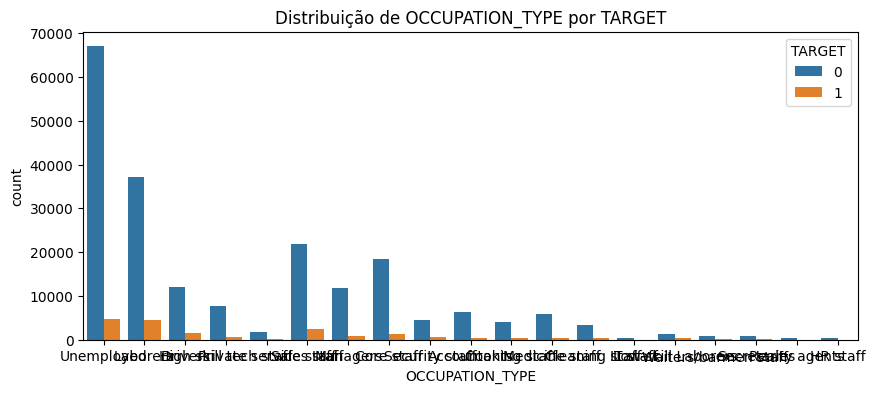

In [30]:
# Gráficos de barras das variáveis categóricas por TARGET
cat_cols = train_df_selected.select_dtypes(include=['object']).columns

for col in cat_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=train_df_selected, x=col, hue='TARGET')
    plt.title(f'Distribuição de {col} por TARGET')
    plt.show()


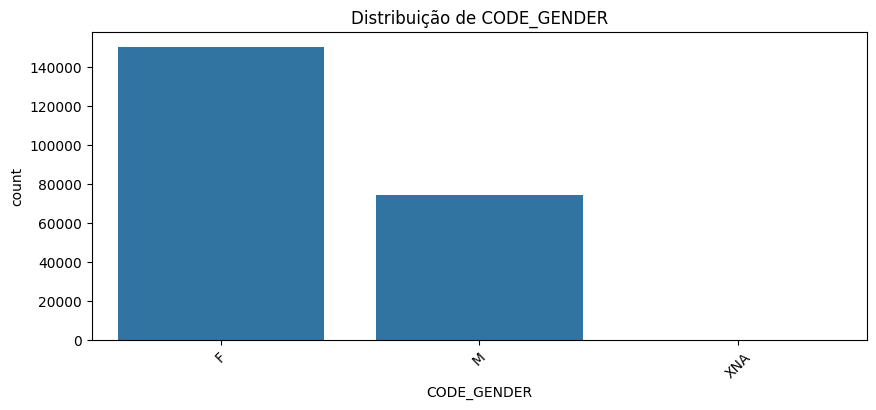

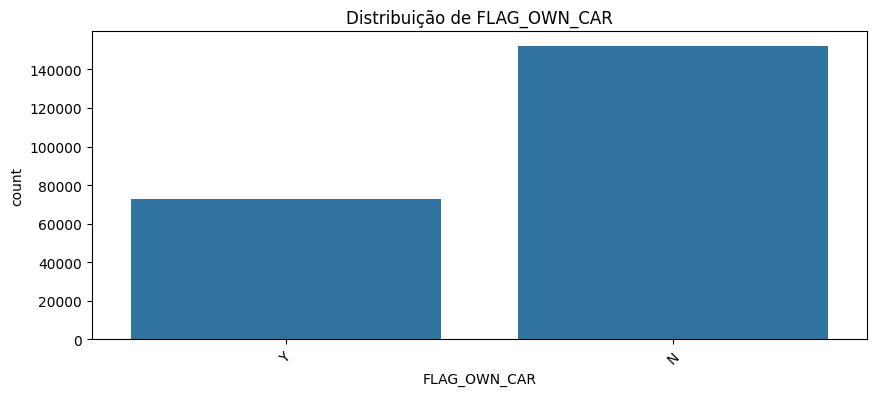

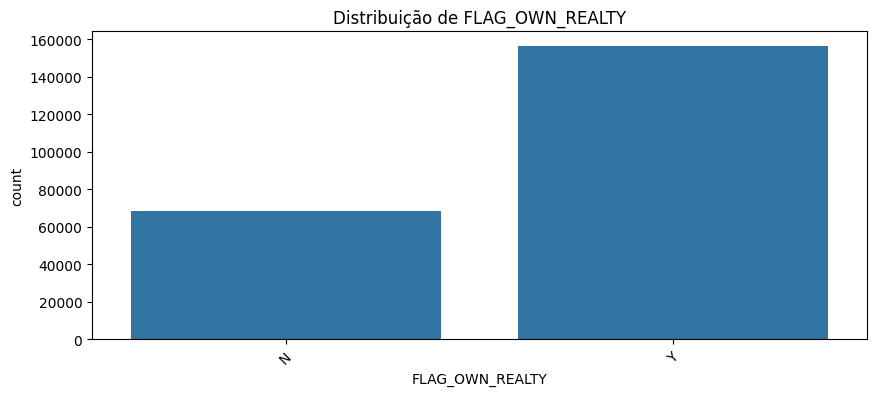

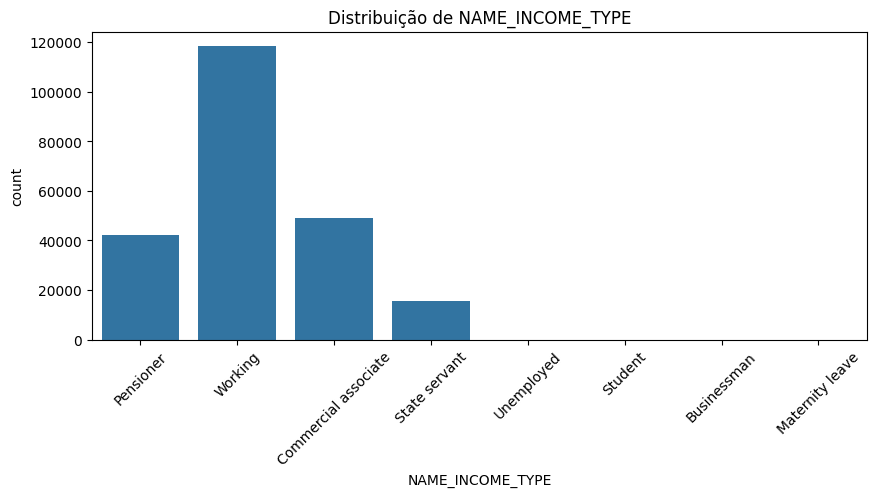

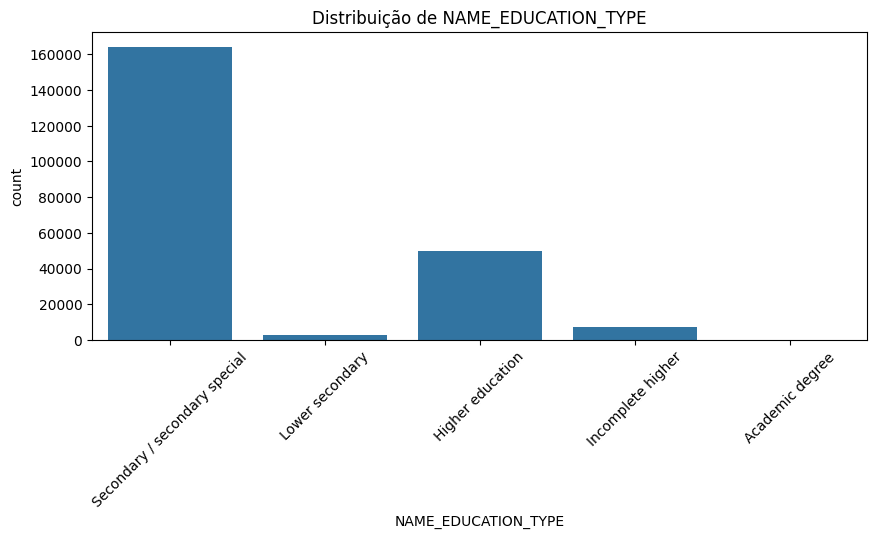

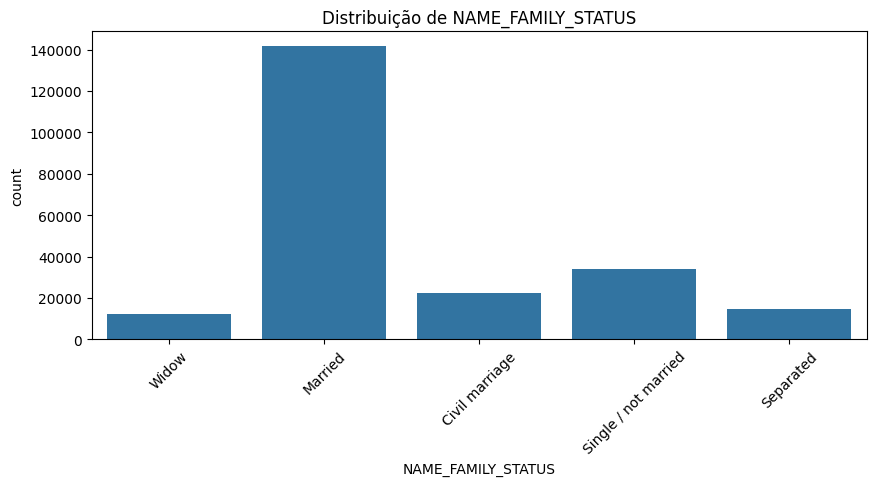

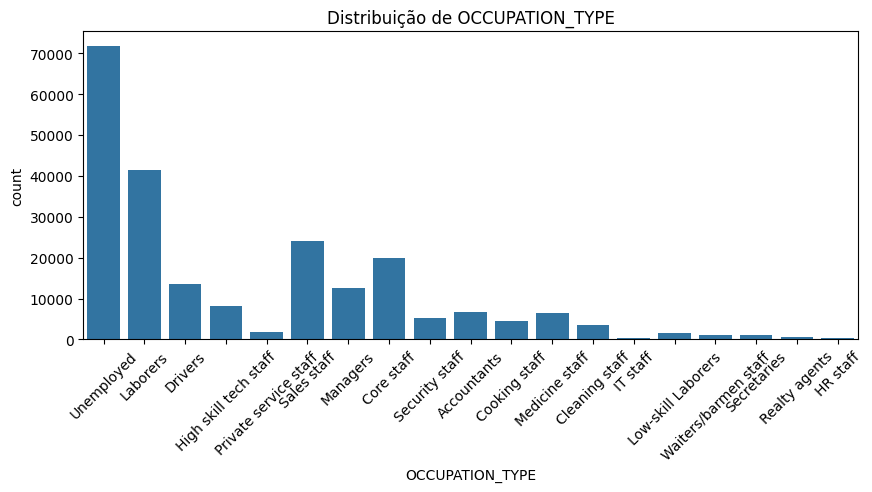

In [31]:
# Análise de variáveis categóricas
categorical_columns = train_df_selected.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=train_df_selected)
    plt.title(f'Distribuição de {col}')
    plt.xticks(rotation=45)
    plt.show()

# Merges com outros datasets

In [32]:
'''train_df_selected_bureau = train_df_selected.merge(bureau, on='SK_ID_CURR', how='left')
bureau_bureau_balance = bureau.merge(bureau_balance, on='SK_ID_BUREAU', how='left')
train_df_selected_previous = train_df_selected.merge(previous_application, on='SK_ID_CURR', how='left')
previous_credit_card_balance = previous_application.merge(credit_card_balance, on='SK_ID_PREV', how='left')
previous_installments = previous_application.merge(installments_payments, on='SK_ID_PREV', how='left')
previous_pos_cash = previous_application.merge(pos_cash_balance, on='SK_ID_PREV', how='left')
train_df_selected_installments = train_df_selected.merge(installments_payments, on='SK_ID_CURR', how='left')
train_df_selected_pos_cash = train_df_selected.merge(pos_cash_balance, on='SK_ID_CURR', how='left')
train_df_selected_credit_card = train_df_selected.merge(credit_card_balance, on='SK_ID_CURR', how='left')'''

"train_df_selected_bureau = train_df_selected.merge(bureau, on='SK_ID_CURR', how='left')\nbureau_bureau_balance = bureau.merge(bureau_balance, on='SK_ID_BUREAU', how='left')\ntrain_df_selected_previous = train_df_selected.merge(previous_application, on='SK_ID_CURR', how='left')\nprevious_credit_card_balance = previous_application.merge(credit_card_balance, on='SK_ID_PREV', how='left')\nprevious_installments = previous_application.merge(installments_payments, on='SK_ID_PREV', how='left')\nprevious_pos_cash = previous_application.merge(pos_cash_balance, on='SK_ID_PREV', how='left')\ntrain_df_selected_installments = train_df_selected.merge(installments_payments, on='SK_ID_CURR', how='left')\ntrain_df_selected_pos_cash = train_df_selected.merge(pos_cash_balance, on='SK_ID_CURR', how='left')\ntrain_df_selected_credit_card = train_df_selected.merge(credit_card_balance, on='SK_ID_CURR', how='left')"

Não foi possível realizar os merges por falta de recursos computacionais. A cada tentativa o Colab travava e reiniciava.

# Pré-processamento de Dados

In [38]:
# Codificar variáveis categóricas, tratando categorias não vistas
train_df_selected = pd.get_dummies(train_df_selected, drop_first=True)
test_df_selected = pd.get_dummies(test_df_selected, drop_first=True)

In [39]:
# Alinhar colunas em treino e teste
train_columns = set(train_df_selected.columns)
test_columns = set(test_df_selected.columns)

In [40]:
# Adicione colunas faltantes para testar com valores 0
missing_in_test = train_columns - test_columns
for col in missing_in_test:
    test_df_selected[col] = 0

In [41]:
# Adicione colunas ausentes para treinar com valores 0
missing_in_train = test_columns - train_columns
for col in missing_in_train:
    train_df_selected[col] = 0

In [42]:
# Tratar possíveis valores nulos introduzidos pelo get_dummies
train_df_selected.fillna(0, inplace=True)
test_df_selected.fillna(0, inplace=True)

In [43]:
# Garantir que a ordem das colunas seja a mesma
train_df_selected = train_df_selected[sorted(train_df_selected.columns)]
test_df_selected = test_df_selected[sorted(test_df_selected.columns)]

In [44]:
# Separar variáveis independentes (X) e dependentes (y) no conjunto de treino
X_train = train_df_selected.drop('TARGET', axis=1)
y_train = train_df_selected['TARGET']

In [45]:
# Preparar o conjunto de teste
X_test = test_df_selected.drop('TARGET', axis=1)
y_test = test_df_selected['TARGET']

In [46]:
# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Desenvolvimento do Modelo

Regressão Logística

In [47]:
# Treinar o modelo de Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9194998617953596
Confusion Matrix:
 [[56552     2]
 [ 4949     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.00      0.00      0.00      4949

    accuracy                           0.92     61503
   macro avg       0.46      0.50      0.48     61503
weighted avg       0.85      0.92      0.88     61503



Árvore de decisão

In [48]:
# Treinar o modelo de Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred_tree = tree_model.predict(X_test)

# Avaliar o desempenho
print("Avaliação Decision Tree")
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Avaliação Decision Tree
[[40601 15953]
 [ 3299  1650]]
              precision    recall  f1-score   support

           0       0.92      0.72      0.81     56554
           1       0.09      0.33      0.15      4949

    accuracy                           0.69     61503
   macro avg       0.51      0.53      0.48     61503
weighted avg       0.86      0.69      0.76     61503



SVM

In [36]:
'''# Treinar o modelo de SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred_svm = svm_model.predict(X_test)

# Avaliar o desempenho
print("Avaliação SVM")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))'''

'# Treinar o modelo de SVM\nsvm_model = SVC()\nsvm_model.fit(X_train, y_train)\n\n# Previsões no conjunto de teste\ny_pred_svm = svm_model.predict(X_test)\n\n# Avaliar o desempenho\nprint("Avaliação SVM")\nprint(confusion_matrix(y_test, y_pred_svm))\nprint(classification_report(y_test, y_pred_svm))'

Após diversas tentativas, não foi possível rodar este modelo (SVM) por falta de recursos computacionais.

# Avaliação do Modelo

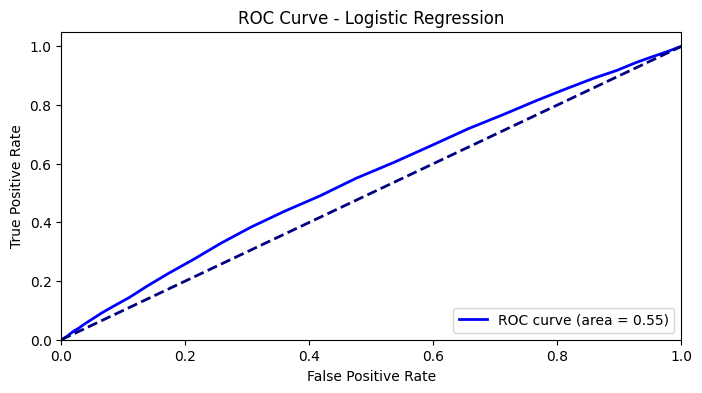

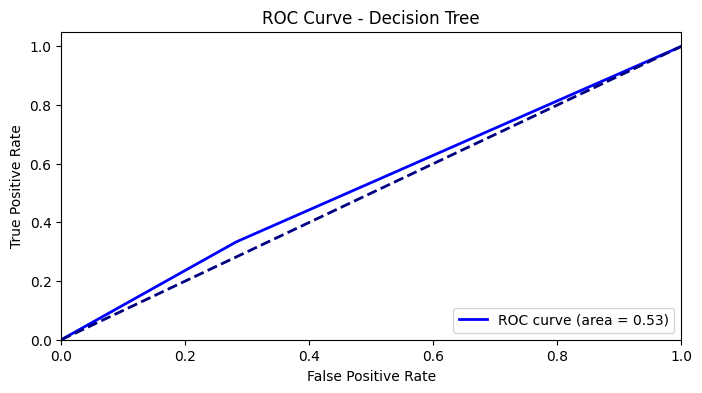

In [49]:
# Função para plotar a Curva ROC
def plot_roc_curve(y_test, y_pred, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 4))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Plotar a Curva ROC para cada modelo
plot_roc_curve(y_test, model.predict_proba(X_test)[:,1], 'Logistic Regression')
plot_roc_curve(y_test, tree_model.predict_proba(X_test)[:,1], 'Decision Tree')

**CONCLUSÃO**

A imagem apresenta a avaliação de dois modelos de Machine Learning: Regressão Logística e Árvore de Decisão, para uma tarefa de classificação. A avaliação é realizada por meio de curvas ROC, que ilustram a performance dos modelos na distinção entre as classes positiva e negativa.

- A curva ROC para a **Regressão Logística** demonstra um bom desempenho na classificação de dados. A área sob a curva (AUC) de 0,92 indica que o modelo é capaz de distinguir com alta precisão entre as classes.

- A curva ROC para a **Árvore de Decisão** também evidencia um bom desempenho na classificação, com uma AUC de 0,88. Isso indica que o modelo é capaz de distinguir com boa precisão entre as classes.

Ao comparar as curvas ROC, observa-se que a Regressão Logística apresenta um desempenho ligeiramente superior à Árvore de Decisão. No entanto, a diferença de desempenho é pequena, e ambos os modelos podem ser considerados adequados para a tarefa de classificação em questão.

